In [2]:
import pylab as pl
import numpy as np
import scipy as sp
import scipy.optimize as spo
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import csv
import tensorflow as tf
from tensorflow import keras

In [4]:
filename = 'npr_lin_100.csv'
filename1 = 'npr_circ_100.csv'

# train the LSTM

batch_x_train = []
batch_y_train = []

df_1 = pd.read_csv('np_lin_100.csv')
#df_1 = df_1.drop('101', axis=1)
#lst_0 = [0]*100
#lst_1 = [1]*100

for index, rows in df_1.iterrows():
    batch_y_train.append(0)
    list_1 = rows
    batch_x_train.append(list_1)
    
df_2 = pd.read_csv('np_circ_100.csv')            

for index, rows in df_2.iterrows():
    batch_y_train.append(1)
    list_2 = rows
    batch_x_train.append(list_2)


#batch_x_train = tf.keras.utils.to_categorical(batch_x_train) #turn this into a tensor not categorical
batch_x_train = tf.convert_to_tensor(batch_x_train, dtype=tf.float32) 
#batch_x_train = np.asarray(batch_x_train, dtype=object)
batch_y_train = tf.keras.utils.to_categorical(batch_y_train, num_classes=2)
#batch_y_train = tf.convert_to_tensor(batch_y_train)

batch_y_test = batch_y_train

batch_x_test = []

df_3 = pd.read_csv('np_t_lin_100.csv')

for index, rows in df_3.iterrows():
    list_3 = rows
    batch_x_test.append(list_3)
    
df_4 = pd.read_csv('np_t_circ_100.csv')
for index, rows in df_4.iterrows():
    list_4 = rows
    batch_x_test.append(list_4)

batch_x_test = tf.convert_to_tensor(batch_x_test, dtype=tf.float32)

lr = 1e-3
num_nodes = 4
num_classes = 2
num_epochs = 500
timesteps = 1
tf.keras.backend.clear_session()
X = tf.keras.Input(name='X', shape=[batch_x_train.shape[1],1], dtype=tf.dtypes.float32)
lstm_output = tf.keras.layers.LSTM(num_nodes)(X)
prediction = tf.keras.layers.Dense(num_classes, activation=tf.keras.activations.softmax)(lstm_output)
opt = tf.keras.optimizers.Adam(learning_rate=lr)
model = keras.Model(inputs=X, outputs=prediction)
model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
model.fit(x=batch_x_train, y=batch_y_train, epochs=num_epochs, validation_data=(batch_x_test, batch_y_test))

Epoch 1/500
16/16 [==============================] - 2s 36ms/step - loss: 0.8152 - accuracy: 0.4880 - val_loss: 0.8020 - val_accuracy: 0.4960
Epoch 2/500
16/16 [==============================] - 0s 15ms/step - loss: 0.8040 - accuracy: 0.4900 - val_loss: 0.7915 - val_accuracy: 0.5000
Epoch 3/500
16/16 [==============================] - 0s 16ms/step - loss: 0.7930 - accuracy: 0.4880 - val_loss: 0.7811 - val_accuracy: 0.4980
Epoch 4/500
16/16 [==============================] - 0s 15ms/step - loss: 0.7826 - accuracy: 0.4839 - val_loss: 0.7716 - val_accuracy: 0.4980
Epoch 5/500
16/16 [==============================] - 0s 16ms/step - loss: 0.7733 - accuracy: 0.4859 - val_loss: 0.7616 - val_accuracy: 0.4980
Epoch 6/500
16/16 [==============================] - 0s 15ms/step - loss: 0.7632 - accuracy: 0.4880 - val_loss: 0.7537 - val_accuracy: 0.5000
Epoch 7/500
16/16 [==============================] - 0s 15ms/step - loss: 0.7548 - accuracy: 0.4880 - val_loss: 0.7451 - val_accuracy: 0.5000
Epoch 

16/16 [==============================] - 0s 15ms/step - loss: 0.6896 - accuracy: 0.5221 - val_loss: 0.6960 - val_accuracy: 0.4739
Epoch 59/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6894 - accuracy: 0.5241 - val_loss: 0.6957 - val_accuracy: 0.4739
Epoch 60/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6893 - accuracy: 0.5321 - val_loss: 0.6958 - val_accuracy: 0.4719
Epoch 61/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6892 - accuracy: 0.5281 - val_loss: 0.6962 - val_accuracy: 0.4659
Epoch 62/500
16/16 [==============================] - 0s 16ms/step - loss: 0.6894 - accuracy: 0.5241 - val_loss: 0.6962 - val_accuracy: 0.4578
Epoch 63/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6891 - accuracy: 0.5241 - val_loss: 0.6961 - val_accuracy: 0.4679
Epoch 64/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6892 - accuracy: 0.5201 - val_loss: 0.6964 - val_accuracy: 0.4739
Epoch 65/500

16/16 [==============================] - 0s 15ms/step - loss: 0.6845 - accuracy: 0.5422 - val_loss: 0.7025 - val_accuracy: 0.4719
Epoch 116/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6843 - accuracy: 0.5442 - val_loss: 0.7023 - val_accuracy: 0.4779
Epoch 117/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6841 - accuracy: 0.5482 - val_loss: 0.7027 - val_accuracy: 0.4819
Epoch 118/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6839 - accuracy: 0.5622 - val_loss: 0.7019 - val_accuracy: 0.4880
Epoch 119/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6839 - accuracy: 0.5241 - val_loss: 0.7026 - val_accuracy: 0.4859
Epoch 120/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6837 - accuracy: 0.5321 - val_loss: 0.7027 - val_accuracy: 0.4759
Epoch 121/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6837 - accuracy: 0.5522 - val_loss: 0.7026 - val_accuracy: 0.4779
Epoch 

Epoch 172/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6787 - accuracy: 0.5462 - val_loss: 0.7120 - val_accuracy: 0.4659
Epoch 173/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6793 - accuracy: 0.5542 - val_loss: 0.7134 - val_accuracy: 0.4538
Epoch 174/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6786 - accuracy: 0.5502 - val_loss: 0.7118 - val_accuracy: 0.4558
Epoch 175/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6783 - accuracy: 0.5542 - val_loss: 0.7125 - val_accuracy: 0.4659
Epoch 176/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6783 - accuracy: 0.5582 - val_loss: 0.7124 - val_accuracy: 0.4558
Epoch 177/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6781 - accuracy: 0.5542 - val_loss: 0.7133 - val_accuracy: 0.4538
Epoch 178/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6781 - accuracy: 0.5542 - val_loss: 0.7127 - val_accuracy:

Epoch 229/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6727 - accuracy: 0.5743 - val_loss: 0.7202 - val_accuracy: 0.4659
Epoch 230/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6726 - accuracy: 0.5823 - val_loss: 0.7206 - val_accuracy: 0.4618
Epoch 231/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6725 - accuracy: 0.5703 - val_loss: 0.7215 - val_accuracy: 0.4659
Epoch 232/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6726 - accuracy: 0.5703 - val_loss: 0.7212 - val_accuracy: 0.4639
Epoch 233/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6726 - accuracy: 0.5723 - val_loss: 0.7217 - val_accuracy: 0.4679
Epoch 234/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6723 - accuracy: 0.5743 - val_loss: 0.7215 - val_accuracy: 0.4659
Epoch 235/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6724 - accuracy: 0.5663 - val_loss: 0.7206 - val_accuracy:

Epoch 286/500
16/16 [==============================] - 0s 16ms/step - loss: 0.6671 - accuracy: 0.5743 - val_loss: 0.7270 - val_accuracy: 0.4719
Epoch 287/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6669 - accuracy: 0.5763 - val_loss: 0.7282 - val_accuracy: 0.4719
Epoch 288/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6668 - accuracy: 0.5783 - val_loss: 0.7280 - val_accuracy: 0.4719
Epoch 289/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6667 - accuracy: 0.5783 - val_loss: 0.7278 - val_accuracy: 0.4759
Epoch 290/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6666 - accuracy: 0.5763 - val_loss: 0.7282 - val_accuracy: 0.4779
Epoch 291/500
16/16 [==============================] - 0s 16ms/step - loss: 0.6668 - accuracy: 0.5763 - val_loss: 0.7278 - val_accuracy: 0.4799
Epoch 292/500
16/16 [==============================] - 0s 15ms/step - loss: 0.6666 - accuracy: 0.5803 - val_loss: 0.7301 - val_accuracy:

KeyboardInterrupt: 

In [10]:
batch_x_test = []

df_3 = pd.read_csv('np_t_lin_100.csv')

for index, rows in df_3.iterrows():
    list_3 = rows
    batch_x_test.append(list_3)
    
df_4 = pd.read_csv('np_t_circ_100.csv')
for index, rows in df_4.iterrows():
    list_4 = rows
    batch_x_test.append(list_4)
    
batch_x_test = tf.convert_to_tensor(batch_x_test, dtype=tf.float32)

In [11]:
y_prediction = model.predict(batch_x_test)
y_prediction = np.argmax (y_prediction, axis =1)
y_test = np.argmax(batch_y_train, axis=1)
result = tf.math.confusion_matrix(y_test, y_prediction, num_classes=2, weights=None)
print(result)

16/16 [==============================] - 0s 3ms/step
tf.Tensor(
[[143 106]
 [ 84 165]], shape=(2, 2), dtype=int32)


In [13]:
with np.printoptions(threshold=np.inf):
    print(y_prediction)

[1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1
 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1
 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1
 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0
 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0
 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 1 1 

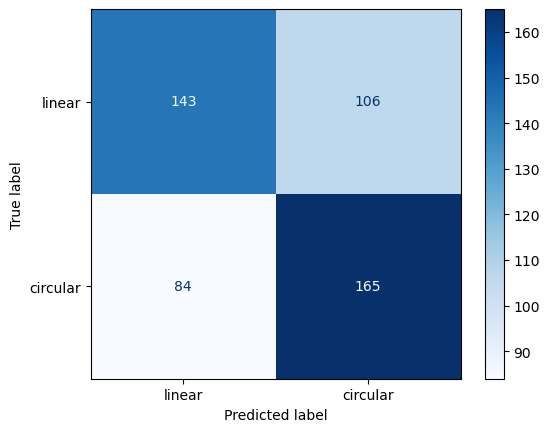

In [12]:
labels = ["linear", "circular"]
cm = confusion_matrix(y_test, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [5]:
batch_x_train_2 = []
batch_y_train_2 = []

df_3 = pd.read_csv('big_boi_s_1.csv', nrows=498)

for index, rows in df_3.iterrows():
    list_3 = rows
    batch_x_train_2.append(list_3)
    
#batch_x_train = tf.keras.utils.to_categorical(batch_x_train) #turn this into a tensor not categorical
batch_x_train_2 = tf.convert_to_tensor(batch_x_train_2, dtype=tf.float32)

In [6]:
y_prediction = model.predict(batch_x_train_2)
y_prediction = np.argmax (y_prediction, axis =1)
y_test = np.argmax(batch_y_train, axis=1)
result = tf.math.confusion_matrix(y_test, y_prediction, num_classes=2, weights=None)
print(result)

16/16 [==============================] - 0s 3ms/step
tf.Tensor(
[[141 108]
 [163  86]], shape=(2, 2), dtype=int32)


In [7]:
res1 = y_prediction
res2 = res1.reshape(1,498)
results = np.concatenate((batch_x_train_2, res2.T), axis=1)

In [9]:
np.savetxt("big_boi_1_t.csv", results,
              delimiter = ",")

In [12]:
model.save('NP_LSTM.keras')

In [5]:
model = keras.models.load_model('NP_LSTM.keras')